<a href="https://www.kaggle.com/code/amirhosseinyousefi/ford-price-prediction?scriptVersionId=143109521" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("ford.csv")
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,145,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,145,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0


In [67]:
df.model.value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

In [68]:
df = df.drop(df[df.model == "Focus"].index)
df.model.value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: model, dtype: int64

In [69]:
df.fuelType.value_counts()

Petrol      12178
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [70]:
df = df.drop(df[df.fuelType == "Other"].index)
df.fuelType.value_counts()

Petrol      12178
Diesel       5762
Hybrid         22
Electric        2
Name: fuelType, dtype: int64

In [71]:
df.transmission.value_counts()

Manual       15517
Automatic     1360
Semi-Auto     1087
Name: transmission, dtype: int64

In [72]:
df.year.value_counts()

2017    4888
2018    4014
2019    3194
2016    2331
2015    1366
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
2060       1
Name: year, dtype: int64

In [73]:
df[df.year > 2020]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


In [74]:
df = df.drop(df[df.year > 2020].index)
df.year.value_counts()

2017    4888
2018    4014
2019    3194
2016    2331
2015    1366
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
Name: year, dtype: int64

In [75]:
df.price.value_counts()

10000    164
11000    153
10500    148
12000    126
9000     118
        ... 
9410       1
19360      1
9287       1
10570      1
18122      1
Name: price, Length: 3511, dtype: int64

In [76]:
df.tax.value_counts()

145    8944
0      2152
150    1944
125    1407
30     1236
20     1210
160     358
200     252
235     123
165     113
205      59
260      41
240      32
265      15
300      11
135      10
140       8
570       6
195       6
325       6
555       4
155       3
115       3
220       3
330       2
120       2
580       2
305       2
190       2
230       2
270       1
185       1
210       1
110       1
290       1
Name: tax, dtype: int64

In [77]:
df.mpg.value_counts()

65.7    2528
54.3    1774
60.1    1674
64.2     995
57.7     961
        ... 
37.1       1
28.0       1
54.2       1
28.5       1
23.9       1
Name: mpg, Length: 90, dtype: int64

In [78]:
df.engineSize.value_counts()

1.0    7764
1.5    3418
2.0    3310
1.2    1626
1.6     923
1.1     559
1.4     111
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      13
3.2       1
1.7       1
Name: engineSize, dtype: int64

In [79]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17963.000000,17963.000000,17963.000000,17963.000000,17963.000000,17963.000000
mean,2016.864277,12279.993821,23362.096810,113.335746,57.907309,1.350788
std,2.024996,4741.436536,19471.763642,62.004352,10.125671,0.432368
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31056.000000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [80]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


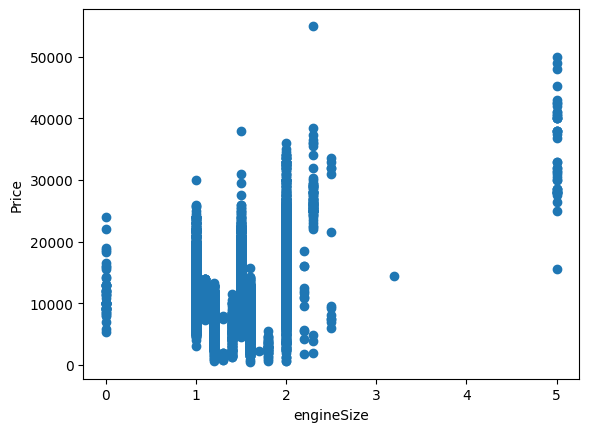

In [81]:
plt.scatter(df.engineSize, df.price)
plt.xlabel("engineSize")
plt.ylabel("Price")
plt.show()

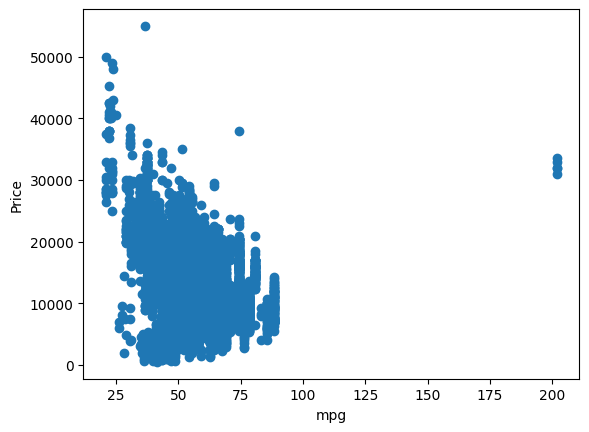

In [82]:
plt.scatter(df.mpg, df.price)
plt.xlabel("mpg")
plt.ylabel("Price")
plt.show()

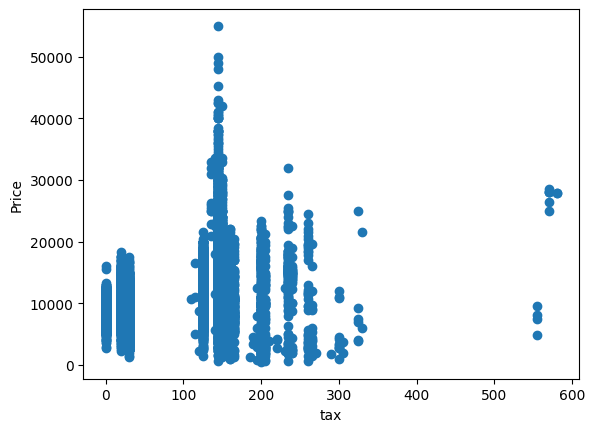

In [83]:
plt.scatter(df.tax, df.price)
plt.xlabel("tax")
plt.ylabel("Price")
plt.show()

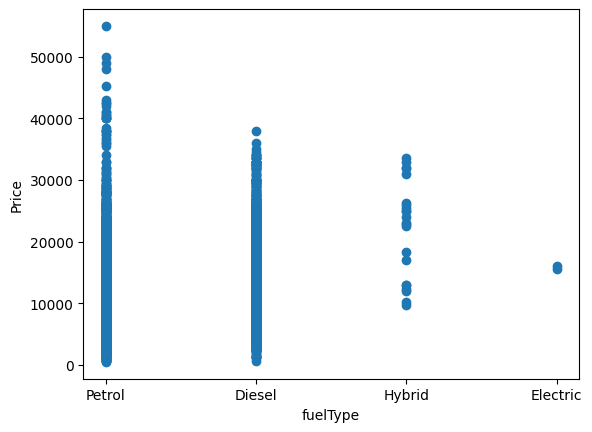

In [84]:
plt.scatter(df.fuelType, df.price)
plt.xlabel("fuelType")
plt.ylabel("Price")
plt.show()

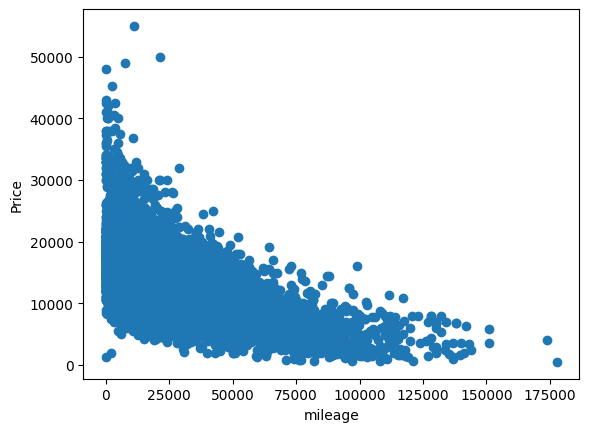

In [85]:
plt.scatter(df.mileage, df.price)
plt.xlabel("mileage")
plt.ylabel("Price")
plt.show()

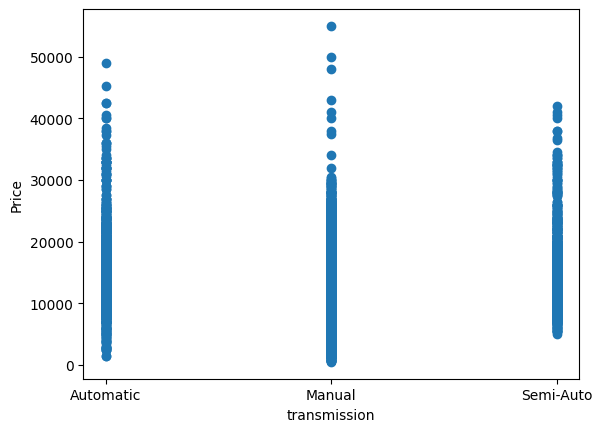

In [86]:
plt.scatter(df.transmission, df.price)
plt.xlabel("transmission")
plt.ylabel("Price")
plt.show()

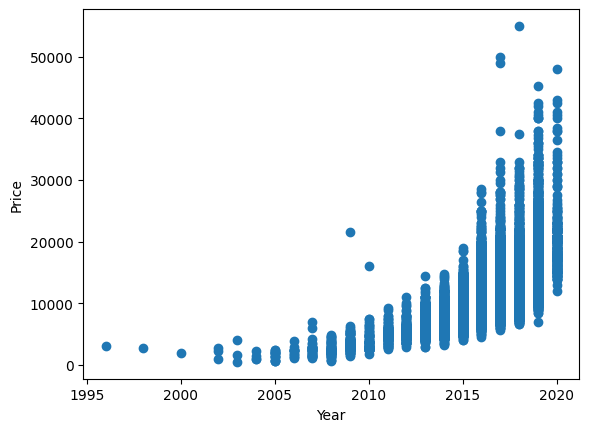

In [87]:
plt.scatter(df.year, df.price)
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [88]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [89]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['model'] = label_encoder.fit_transform(df['model'])
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,6,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,6,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,5,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,5,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,5,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,0,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,0,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,6,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [90]:
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['fuelType'] = label_encoder.fit_transform(df['fuelType'])

In [91]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,3,150,57.7,1.0
1,6,2018,14000,1,9083,3,150,57.7,1.0
2,6,2017,13000,1,12456,3,150,57.7,1.0
3,5,2019,17500,1,10460,3,145,40.3,1.5
4,5,2019,16500,0,1482,3,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,5,2016,7999,1,31348,3,125,54.3,1.2
17961,0,2017,8999,1,16700,3,150,47.1,1.4
17962,0,2014,7499,1,40700,3,30,57.7,1.0
17963,6,2015,9999,1,7010,0,20,67.3,1.6


In [92]:
x = np.asanyarray(df[['model', 'year', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize']])
y = np.asanyarray(df[['price']])

mask = np.random.rand(len(df)) < 0.8

train_x = x[mask]
train_y = y[mask]

test_x = x[~mask]
test_y = y[~mask]

In [93]:
print(len(test_x))
print(len(train_y))

3588
14375


In [94]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression().fit(train_x, train_y)

In [95]:
print(regr.coef_)
print(regr.intercept_)

[[ 3.16198536e+01  1.25020260e+03 -3.23811022e+02 -5.73242501e-02
  -4.28276965e+02 -1.09832946e+02  4.15472641e+03]]
[-2506131.48336346]


In [96]:
regr.score(test_x, test_y)

0.7495024920288165